In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiP0v4f-YyKs0TGX3HdWsjmeOvcjiOlt0hdY3QlCWH-9vFsKdgXHlI
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/5th sem/ML/MLLAB/Cricket_chirps.csv')
#normalized df
df = df/(df.max().max())
print(df)

             X         Y
0     0.949625  0.203644
1     0.767417  0.171490
2     1.000000  0.235798
3     0.903537  0.182208
4     0.863880  0.203644
...        ...       ...
1494  0.868167  0.182208
1495  0.868167  0.182208
1496  0.921758  0.182208
1497  0.889603  0.214362
1498  0.771704  0.171490

[1499 rows x 2 columns]


In [ ]:
train_set = df.sample(frac = 0.6)
remain_set = df.drop(train_set.index)
validation_set = remain_set.sample(frac = 0.5)
test_set = remain_set.drop(validation_set.index)

print((train_set))
print((test_set))
print((validation_set))




             X         Y
1212  0.771704  0.182208
720   0.803858  0.203644
298   0.814577  0.192926
283   0.953912  0.225080
1166  0.921758  0.214362
...        ...       ...
441   0.953912  0.182208
488   0.964630  0.235798
379   0.782422  0.171490
674   0.911040  0.203644
1265  0.911040  0.182208

[899 rows x 2 columns]
             X         Y
0     0.949625  0.203644
3     0.903537  0.182208
7     0.878885  0.192926
8     0.743837  0.160772
17    0.814577  0.171490
...        ...       ...
1480  0.793140  0.192926
1482  0.868167  0.171490
1484  0.911040  0.225080
1487  0.857449  0.214362
1497  0.889603  0.214362

[300 rows x 2 columns]
             X         Y
431   0.825295  0.182208
942   0.739550  0.182208
876   0.868167  0.192926
675   0.771704  0.171490
1457  0.803858  0.192926
...        ...       ...
370   0.760986  0.182208
646   0.803858  0.192926
799   0.750268  0.182208
794   0.771704  0.171490
1045  0.782422  0.192926

[300 rows x 2 columns]


['X', 'Y']


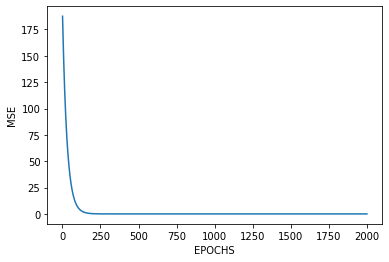

0.0014855220324226032


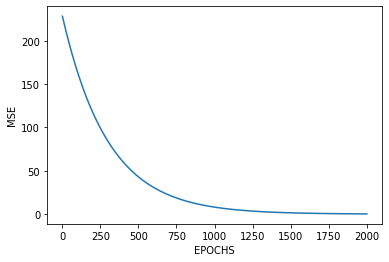

0.28622665997830554


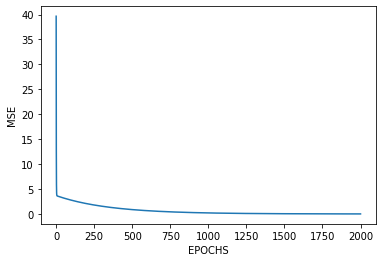

0.011785020305970326


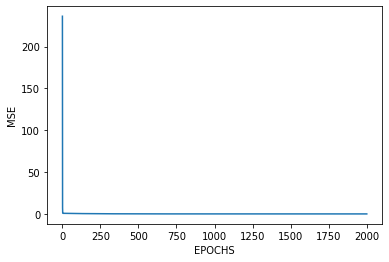

0.00013415424591095595


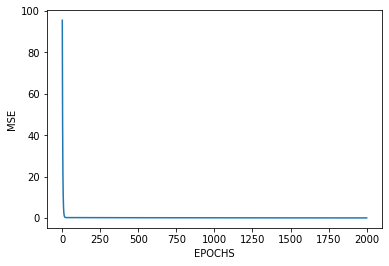

0.028396926099628482


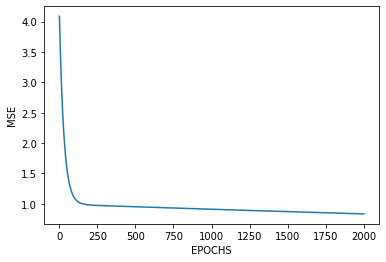

0.8316321547996691


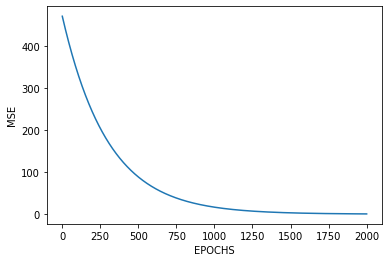

0.5854872678173794


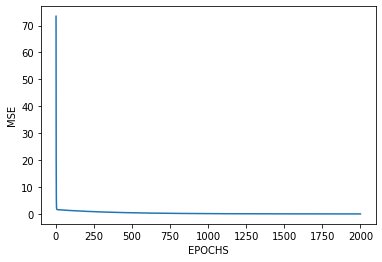

0.008124549233967058


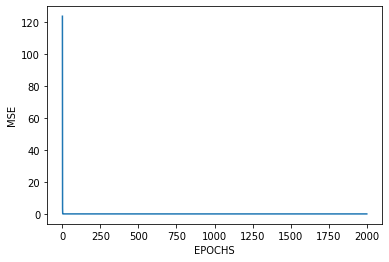

9.065001023964562e-05


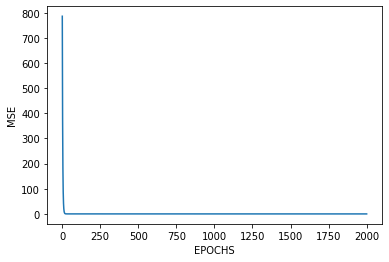

0.01795298015532815


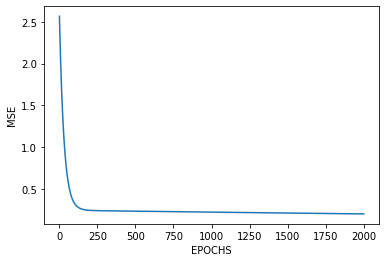

0.20409199535567557


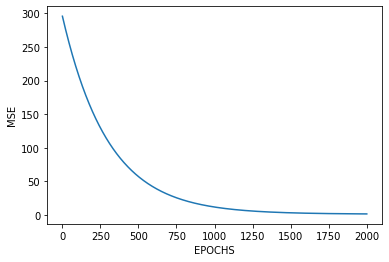

1.677329293104162


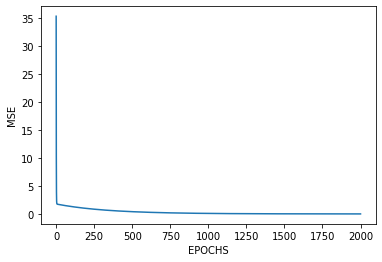

0.004812224183683783


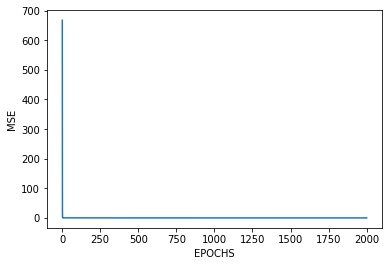

0.00010251922109156003


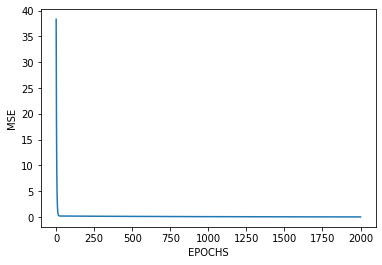

0.028885644935749757


In [ ]:
def cal_MSE(df, alpha):
  n = len(df.columns)-1 #features
  m = len(df) # patterns

  a = df.values

 
  w = ([random.randint(-30,30) for i in range(n+1)])
  

  col_names = list(df.columns)

  x = a[:,0:n]
  

  



  # output
  y = list(df[col_names[len(col_names)-1]])


  
  
  
  

  



  epochs = 2000

  epoch_graph = []
  mse_graph = []
  for i in range(epochs):
    epoch_graph.append(i+1)

  for l in range(epochs):
    # predicted
    h = []
    for i in range(m):
      predicted_value = w[0]
      for j in range(1,len(w)):
        predicted_value = predicted_value + w[j]*(x[i][j-1])
      h.append(predicted_value)

    
    J = 0


    for i in range(len(y)):
      J = J + pow((h[i] - y[i]),2)
    J = J/(2*m)

    mse_graph.append(J)

    
    
    

    # print('h : ',h)
    # updating W


    for k in range(len(w)):
      if k==0:
        sum = 0
        for i in range(len(h)):
          sum = sum + h[i] - y[i]

        w[0] = w[0] - (alpha/m)*(sum)

      else:
        sum = 0
        for i in range(len(h)):
          sum = sum + (h[i]-y[i])*(x[i][k-1])

        w[k] = w[k] - (alpha/m)*(sum)

    # print(w)



  plt.plot(epoch_graph,mse_graph)
  plt.xlabel("EPOCHS")
  # naming the y axis
  plt.ylabel("MSE")
  plt.show()
    
  J = 0

  h = []
  for i in range(m):
    predicted_value = w[0]
    for j in range(1,len(w)):
      predicted_value = predicted_value + w[j]*(x[i][j-1])
      h.append(predicted_value)




  for i in range(len(y)):
    J = J + pow((h[i] - y[i]),2)
  J = J/(2*m)

  return J






# print(cal_MSE(train_set,0.01))
# df2 = pd.DataFrame([[1,2,6],[2,10,24]],columns = ['a','b','c'])
# print(cal_MSE(df2,0.1))
print(list(df.columns))
print(cal_MSE(train_set,0.01))
print(cal_MSE(train_set,0.001))
print(cal_MSE(train_set,0.3))
print(cal_MSE(train_set,0.5))
print(cal_MSE(train_set,0.1))
print(cal_MSE(validation_set,0.01))
print(cal_MSE(validation_set,0.001))
print(cal_MSE(validation_set,0.3))
print(cal_MSE(validation_set,0.5))
print(cal_MSE(validation_set,0.1))
print(cal_MSE(test_set,0.01))
print(cal_MSE(test_set,0.001))
print(cal_MSE(test_set,0.3))
print(cal_MSE(test_set,0.5))
print(cal_MSE(test_set,0.1))

In [ ]:

a = df.values
n = len(df.columns)-1 #features
x = a[:,0:n]
print(a)
print(x)


[[0.94962482 0.20364415]
 [0.76741689 0.17148981]
 [1.         0.23579849]
 ...
 [0.92175774 0.18220793]
 [0.8896034  0.21436227]
 [0.77170415 0.17148981]]
[[0.94962482]
 [0.76741689]
 [1.        ]
 ...
 [0.92175774]
 [0.8896034 ]
 [0.77170415]]
